In [2]:
#Library imports
import pandas as pd
import numpy as np

In [3]:
# required packages
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import tree
from sklearn.decomposition import TruncatedSVD
np.random.seed()
import random
random.seed()

#Dataset imports

In [4]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=False)

Mounted at /content/drive


In [5]:
#Using aggregated datasets
df_tfidf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/business_tf_idf.csv')
df_glove = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/business_GloVe.csv')
df_fasttext = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/business_fasttext.csv')

In [ ]:
df_tfidf.head(3)

,Unnamed: 0,Business ID,review_content,rounded_rating,review_expanded,review_token,Potential_misspells,review_tagged,review_lemmas,review_norm,...,rent,epitome,bond,amazed,feces,mystery,sara,unconcerned,menu,premier
0,0,24-7-care-at-home-westminster-2,A great Home health service located right in t...,5.0,A great Home health service located right in t...,"['A', 'great', 'Home', 'health', 'service', 'l...","{'s', ':)', 'tv'}","[('A', 'DT'), ('great', 'JJ'), ('Home', 'NNP')...","['A', 'great', 'Home', 'health', 'service', 'l...","['great', 'home', 'health', 'service', 'locate...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4-ever-green-collective-riverside,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,5.0,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,"['4', 'EVER', 'GREEN', 'COLLECTIVE', '2781', '...","{'latez', 'jerkey', 'keef', '8th', 's', 'rubid...","[('4', 'CD'), ('EVER', 'NNP'), ('GREEN', 'NNP'...","['4', 'EVER', 'GREEN', 'COLLECTIVE', '2781', '...","['ever', 'green', 'collective', 'rubidoux', 'b...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,a-doctors-weight-loss-clinic-moreno-valley-2,Doctor Brysk and her staff is great. I have r...,4.5,Doctor Brysk and her staff is great. I have re...,"['Doctor', 'Brysk', 'and', 'her', 'staff', 'is...","{'isabell', 'dwlc', 'l', 'hcg', 's', 'lbs', 'a...","[('Doctor', 'NNP'), ('Brysk', 'NNP'), ('and', ...","['Doctor', 'Brysk', 'and', 'her', 'staff', 'be...","['doctor', 'brysk', 'staff', 'great', 'recomme...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_tfidf.shape

(2429, 4897)

In [ ]:
df_glove.head(3)

,Unnamed: 0,Business ID,review_content,rounded_rating,review_expanded,review_token,Potential_misspells,review_tagged,review_lemmas,review_norm,...,AWE91,AWE92,AWE93,AWE94,AWE95,AWE96,AWE97,AWE98,AWE99,AWE100
0,0,24-7-care-at-home-westminster-2,A great Home health service located right in t...,5.0,A great Home health service located right in t...,"['A', 'great', 'Home', 'health', 'service', 'l...","{'s', ':)', 'tv'}","[('A', 'DT'), ('great', 'JJ'), ('Home', 'NNP')...","['A', 'great', 'Home', 'health', 'service', 'l...","['great', 'home', 'health', 'service', 'locate...",...,-0.065254,-0.011395,0.119849,0.071879,-0.062794,-0.181202,0.008597,-0.208313,0.126262,-0.023945
1,1,4-ever-green-collective-riverside,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,5.0,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,"['4', 'EVER', 'GREEN', 'COLLECTIVE', '2781', '...","{'latez', 'jerkey', 'keef', '8th', 's', 'rubid...","[('4', 'CD'), ('EVER', 'NNP'), ('GREEN', 'NNP'...","['4', 'EVER', 'GREEN', 'COLLECTIVE', '2781', '...","['ever', 'green', 'collective', 'rubidoux', 'b...",...,-0.081501,0.100409,0.025377,0.006594,-0.139774,-0.083668,0.013225,-0.212144,0.141470,-0.017754
2,2,a-doctors-weight-loss-clinic-moreno-valley-2,Doctor Brysk and her staff is great. I have r...,4.5,Doctor Brysk and her staff is great. I have re...,"['Doctor', 'Brysk', 'and', 'her', 'staff', 'is...","{'isabell', 'dwlc', 'l', 'hcg', 's', 'lbs', 'a...","[('Doctor', 'NNP'), ('Brysk', 'NNP'), ('and', ...","['Doctor', 'Brysk', 'and', 'her', 'staff', 'be...","['doctor', 'brysk', 'staff', 'great', 'recomme...",...,-0.067142,0.026915,0.132370,0.033468,-0.140541,-0.123461,-0.029329,-0.181832,0.202332,-0.037064


In [7]:
df_glove.shape

(2429, 112)

In [ ]:
df_fasttext.head(3)

,Unnamed: 0,Business ID,review_content,rounded_rating,review_expanded,review_token,Potential_misspells,review_tagged,review_lemmas,review_norm,...,AWE291,AWE292,AWE293,AWE294,AWE295,AWE296,AWE297,AWE298,AWE299,AWE300
0,0,24-7-care-at-home-westminster-2,A great Home health service located right in t...,5.0,A great Home health service located right in t...,"['A', 'great', 'Home', 'health', 'service', 'l...","{'s', ':)', 'tv'}","[('A', 'DT'), ('great', 'JJ'), ('Home', 'NNP')...","['A', 'great', 'Home', 'health', 'service', 'l...","['great', 'home', 'health', 'service', 'locate...",...,0.005721,0.016212,-0.022509,0.004111,0.004926,-0.001867,0.004536,-0.004855,-0.000156,-0.007780
1,1,4-ever-green-collective-riverside,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,5.0,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,"['4', 'EVER', 'GREEN', 'COLLECTIVE', '2781', '...","{'latez', 'jerkey', 'keef', '8th', 's', 'rubid...","[('4', 'CD'), ('EVER', 'NNP'), ('GREEN', 'NNP'...","['4', 'EVER', 'GREEN', 'COLLECTIVE', '2781', '...","['ever', 'green', 'collective', 'rubidoux', 'b...",...,-0.001465,0.010811,-0.022949,0.000766,0.005884,-0.003707,0.005854,-0.006865,-0.008023,-0.004498
2,2,a-doctors-weight-loss-clinic-moreno-valley-2,Doctor Brysk and her staff is great. I have r...,4.5,Doctor Brysk and her staff is great. I have re...,"['Doctor', 'Brysk', 'and', 'her', 'staff', 'is...","{'isabell', 'dwlc', 'l', 'hcg', 's', 'lbs', 'a...","[('Doctor', 'NNP'), ('Brysk', 'NNP'), ('and', ...","['Doctor', 'Brysk', 'and', 'her', 'staff', 'be...","['doctor', 'brysk', 'staff', 'great', 'recomme...",...,-0.000403,0.012335,-0.027164,0.002162,0.006121,-0.005714,-0.002126,-0.007543,-0.002463,-0.006450


In [8]:
df_fasttext.shape

(2429, 312)

#TF-IDF

In [ ]:
df_tfidf.columns[:15]

Index(['Unnamed: 0', 'Business ID ', 'review_content', 'rounded_rating',
       'review_expanded', 'review_token', 'Potential_misspells',
       'review_tagged', 'review_lemmas', 'review_norm', 'cleaned_review',
       'messageID', 'great', 'home', 'health'],
      dtype='object')

In [ ]:
df_tfidf.head(3)

,Unnamed: 0,Business ID,review_content,rounded_rating,review_expanded,review_token,Potential_misspells,review_tagged,review_lemmas,review_norm,...,rent,epitome,bond,amazed,feces,mystery,sara,unconcerned,menu,premier
0,0,24-7-care-at-home-westminster-2,A great Home health service located right in t...,5.0,A great Home health service located right in t...,"['A', 'great', 'Home', 'health', 'service', 'l...","{'s', ':)', 'tv'}","[('A', 'DT'), ('great', 'JJ'), ('Home', 'NNP')...","['A', 'great', 'Home', 'health', 'service', 'l...","['great', 'home', 'health', 'service', 'locate...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4-ever-green-collective-riverside,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,5.0,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,"['4', 'EVER', 'GREEN', 'COLLECTIVE', '2781', '...","{'latez', 'jerkey', 'keef', '8th', 's', 'rubid...","[('4', 'CD'), ('EVER', 'NNP'), ('GREEN', 'NNP'...","['4', 'EVER', 'GREEN', 'COLLECTIVE', '2781', '...","['ever', 'green', 'collective', 'rubidoux', 'b...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,a-doctors-weight-loss-clinic-moreno-valley-2,Doctor Brysk and her staff is great. I have r...,4.5,Doctor Brysk and her staff is great. I have re...,"['Doctor', 'Brysk', 'and', 'her', 'staff', 'is...","{'isabell', 'dwlc', 'l', 'hcg', 's', 'lbs', 'a...","[('Doctor', 'NNP'), ('Brysk', 'NNP'), ('and', ...","['Doctor', 'Brysk', 'and', 'her', 'staff', 'be...","['doctor', 'brysk', 'staff', 'great', 'recomme...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


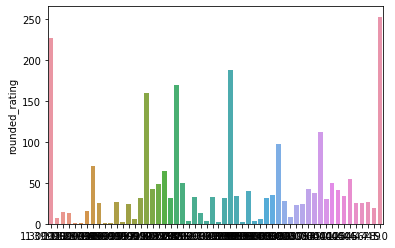

In [ ]:
import seaborn as sns

# Explore the rating score
x = df_tfidf['rounded_rating'].value_counts()
sns.barplot(x.index,x)

In [ ]:
df_tfidf = df_tfidf.drop(['Unnamed: 0'], axis=1).reset_index()

In [ ]:
df_tfidf.head(3)

,index,Business ID,review_content,rounded_rating,review_expanded,review_token,Potential_misspells,review_tagged,review_lemmas,review_norm,...,rent,epitome,bond,amazed,feces,mystery,sara,unconcerned,menu,premier
0,0,24-7-care-at-home-westminster-2,A great Home health service located right in t...,5.0,A great Home health service located right in t...,"['A', 'great', 'Home', 'health', 'service', 'l...","{'s', ':)', 'tv'}","[('A', 'DT'), ('great', 'JJ'), ('Home', 'NNP')...","['A', 'great', 'Home', 'health', 'service', 'l...","['great', 'home', 'health', 'service', 'locate...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4-ever-green-collective-riverside,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,5.0,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,"['4', 'EVER', 'GREEN', 'COLLECTIVE', '2781', '...","{'latez', 'jerkey', 'keef', '8th', 's', 'rubid...","[('4', 'CD'), ('EVER', 'NNP'), ('GREEN', 'NNP'...","['4', 'EVER', 'GREEN', 'COLLECTIVE', '2781', '...","['ever', 'green', 'collective', 'rubidoux', 'b...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,a-doctors-weight-loss-clinic-moreno-valley-2,Doctor Brysk and her staff is great. I have r...,4.5,Doctor Brysk and her staff is great. I have re...,"['Doctor', 'Brysk', 'and', 'her', 'staff', 'is...","{'isabell', 'dwlc', 'l', 'hcg', 's', 'lbs', 'a...","[('Doctor', 'NNP'), ('Brysk', 'NNP'), ('and', ...","['Doctor', 'Brysk', 'and', 'her', 'staff', 'be...","['doctor', 'brysk', 'staff', 'great', 'recomme...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Setting the target variable as 1 and 0, 1 for rating >= 3.0 and 0 for rating <3.0
df_tfidf['Target'] = df_tfidf['rounded_rating'].apply(lambda x:1 if x>=3 else 0)
df_tfidf['Target'].value_counts()

1    1274
0    1155
Name: Target, dtype: int64

In [ ]:
#check for null values
df_tfidf.isnull().sum()/len(df_tfidf)*100

index              0.0
Business ID        0.0
review_content     0.0
rounded_rating     0.0
review_expanded    0.0
                  ... 
sara               0.0
unconcerned        0.0
menu               0.0
premier            0.0
Target             0.0
Length: 4898, dtype: float64

In [ ]:
df_tfidf.isna().any()

index              False
Business ID        False
review_content     False
rounded_rating     False
review_expanded    False
                   ...  
sara               False
unconcerned        False
menu               False
premier            False
Target             False
Length: 4898, dtype: bool

##Train Test Split TF-IDF

In [ ]:
df_tfidf.columns[11:]

Index(['messageID', 'great', 'home', 'health', 'service', 'locate', 'right',
       'center', 'city', 'dad',
       ...
       'epitome', 'bond', 'amazed', 'feces', 'mystery', 'sara', 'unconcerned',
       'menu', 'premier', 'Target'],
      dtype='object', length=4887)

In [ ]:
from sklearn.model_selection import train_test_split

#train/test split (full feature set)

X_train, X_test, y_train, y_test = train_test_split(df_tfidf.drop(['Target'],axis =1).iloc[:, 12:], 
                                                    df_tfidf['Target'], stratify=df_tfidf['Target'],
                                                    test_size=0.2, random_state=101) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(X_train))
print("The shape of training/test feature set:", X_train.shape)
print("The length of testing  set:", len(X_test))

The length of training set: 1943
The shape of training/test feature set: (1943, 4885)
The length of testing  set: 486


##Logistic Regression

###Full feature set

In [ ]:
from sklearn.linear_model import LogisticRegression

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

def grid_search_logistic_regression(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10,  random_state = 4561, shuffle=True) 
    logreg = LogisticRegression(max_iter = 500)
    grid_search = GridSearchCV(logreg, param_grid, scoring=scorers, refit=refit_score, 
                               cv=skf, return_train_score=True, n_jobs = -1, verbose =1)
    
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
param_grid = {"C":[0.1, 1, 10], 
              "penalty":["l1","l2"]}

%time grid_search_logistic_regression(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

Best score: 0.855
Best parameters set:
	C: 10
	penalty: 'l2'
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       231
           1       0.88      0.87      0.88       255

    accuracy                           0.87       486
   macro avg       0.87      0.87      0.87       486
weighted avg       0.87      0.87      0.87       486

CPU times: user 1.7 s, sys: 441 ms, total: 2.14 s
Wall time: 18 s


In [ ]:
# Use the tuned hyper-parameter to fit the model
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(penalty= 'l2', C = 10)

%time clf_lr.fit (X_train, y_train)
print(clf_lr.score (X_test ,y_test))

y_predict = clf_lr.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 1.26 s, sys: 177 ms, total: 1.44 s
Wall time: 795 ms
0.8724279835390947


,Predicted Not Good,Predicted Good
True Not Good,201,30
True Good,32,223


In [ ]:
# append the result to performance table
fields = ['model', 'precision', 'recall', 'accuracy', 'f1','auc']
table_tfidf  = {}
scores = dict()

In [ ]:
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict),
          'auc': roc_auc_score(y_test, y_predict)}
table_tfidf['Logistic Regression with full tf_idf feature set'] = scores

###With SVD

In [ ]:
# determine the number of SVD features to keep 
from sklearn.decomposition import TruncatedSVD

X = df_tfidf.drop(['Target'],axis =1).iloc[:, 12:]

var_explained = []
for i in range(2, 4885):
  svd = TruncatedSVD(n_components= i)
  svd.fit(X) 
  var_explained.append(svd.explained_variance_ratio_.sum())
  if svd.explained_variance_ratio_.sum()>0.6:
    break

In [ ]:
#variance explained of the first 20 items
var_explained[:20]

[0.02364866247051497,
 0.03520259116875367,
 0.04550208582022298,
 0.05554754548065744,
 0.06464191831441993,
 0.07356477003153711,
 0.08162016447939424,
 0.0897378203090854,
 0.09769766347368508,
 0.10559743808767288,
 0.11327742627210019,
 0.12069890393070462,
 0.12767985865876938,
 0.1341629643760793,
 0.14032613770698502,
 0.1461289607078302,
 0.15205294051270982,
 0.15759430149994105,
 0.16327000990110063,
 0.1686137733017231]

In [ ]:
print("Variance Explained with 207 SVs:", var_explained[206]) 

#0.6 variance achieved with 207 dimensions

Variance Explained with 207 SVs: 0.599925523674802


In [ ]:
svd = TruncatedSVD(n_components= 207)
svd.fit(X)
X_svd = svd.transform(X)
X_svd.shape

(2429, 207)

In [ ]:
from sklearn.model_selection import train_test_split

# Test/train split (reduced feature set)
X_train_svd, X_test_svd, y_train_svd, y_test_svd = train_test_split(X_svd, 
                                                    df_tfidf['Target'], stratify=df_tfidf['Target'],
                                                    test_size=0.2, random_state=101) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(X_train_svd))
print("The shape of training/test feature set:", X_train_svd.shape)
print("The length of testing  set:", len(X_test_svd))

The length of training set: 1943
The shape of training/test feature set: (1943, 207)
The length of testing  set: 486


In [ ]:
param_grid = {"C":[0.1, 1, 10], 
              "penalty":["l1","l2"]}

%time grid_search_logistic_regression(X_train_svd, X_test_svd, y_train_svd, y_test_svd, param_grid)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best score: 0.852
Best parameters set:
	C: 10
	penalty: 'l2'
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       231
           1       0.88      0.87      0.87       255

    accuracy                           0.87       486
   macro avg       0.87      0.87      0.87       486
weighted avg       0.87      0.87      0.87       486

CPU times: user 200 ms, sys: 180 ms, total: 380 ms
Wall time: 2.59 s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

In [ ]:
# Use the tuned hyper-parameter to fit the model and
clf_lr_svd = LogisticRegression(penalty= 'l2', C = 10)

%time clf_lr_svd.fit (X_train_svd, y_train_svd)
print(clf_lr_svd.score (X_test_svd ,y_test_svd))

y_predict = clf_lr_svd.predict(X_test_svd)
pd.DataFrame(    
             confusion_matrix(y_test_svd, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 42.9 ms, sys: 21.5 ms, total: 64.4 ms
Wall time: 33.3 ms
0.8662551440329218


,Predicted Not Good,Predicted Good
True Not Good,200,31
True Good,34,221


In [ ]:
scores = {'precision': precision_score(y_test_svd, y_predict),
          'recall': recall_score(y_test_svd, y_predict),
          'accuracy':accuracy_score(y_test_svd, y_predict),
          'f1': f1_score(y_test_svd, y_predict),
          'auc': roc_auc_score(y_test_svd, y_predict)}
table_tfidf['Logistic Regression with TruncatedSVD tf_idf feature set'] = scores

##SVM

###Full feature set

In [ ]:
# Test/train split (full feature set)
from sklearn.model_selection import train_test_split

# Straified sampling
X_train, X_test, y_train, y_test = train_test_split(df_tfidf.drop(['Target'],axis =1).iloc[:, 12:], 
                                                    df_tfidf['Target'], stratify=df_tfidf['Target'],
                                                    test_size=0.2, random_state=101) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(X_train))
print("The shape of training/test feature set:", X_train.shape)
print("The length of testing  set:", len(X_test))

The length of training set: 1943
The shape of training/test feature set: (1943, 4885)
The length of testing  set: 486


In [ ]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

def grid_search_SVM(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10) 
    grid_search = GridSearchCV(SVC(), param_grid, scoring=scorers, refit=refit_score,
                               cv=skf, return_train_score=True, n_jobs = -1, verbose =1)
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
param_grid = {'C': [ 1, 10], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
%time grid_search_SVM(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best score: 0.821
Best parameters set:
	C: 10
	gamma: 1
	kernel: 'rbf'
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       231
           1       0.93      0.76      0.84       255

    accuracy                           0.85       486
   macro avg       0.86      0.85      0.85       486
weighted avg       0.86      0.85      0.85       486

CPU times: user 27.4 s, sys: 1.35 s, total: 28.7 s
Wall time: 17min 28s


In [ ]:
# Use the tuned hyper-parameter to fit the model
clf_svm = SVC(C = 10, gamma = 1, kernel = 'rbf')

%time clf_svm.fit (X_train, y_train)
print(clf_svm.score (X_test ,y_test))

y_predict = clf_svm.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 15.1 s, sys: 32.3 ms, total: 15.1 s
Wall time: 15 s
0.8477366255144033


,Predicted Not Good,Predicted Good
True Not Good,217,14
True Good,60,195


In [ ]:
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict),
          'auc': roc_auc_score(y_test, y_predict)}
table_tfidf['SVM with full tf_idf feature set'] = scores

###With SVD

In [ ]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'poly']} 
%time grid_search_SVM(X_train_svd, X_test_svd, y_train_svd, y_test_svd, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.805
Best parameters set:
	C: 10
	gamma: 1
	kernel: 'rbf'
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       231
           1       0.93      0.74      0.82       255

    accuracy                           0.83       486
   macro avg       0.84      0.84      0.83       486
weighted avg       0.85      0.83      0.83       486

CPU times: user 2.08 s, sys: 192 ms, total: 2.27 s
Wall time: 2min 9s


In [ ]:
# Use the tuned hyper-parameter to fit the model
clf_svm_svd = SVC(C = 10, gamma = 1, kernel = 'rbf')

%time clf_svm_svd.fit (X_train_svd, y_train_svd)
print(clf_svm_svd.score (X_test_svd ,y_test_svd))

y_predict = clf_svm_svd.predict(X_test_svd)
pd.DataFrame(    
             confusion_matrix(y_test_svd, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 425 ms, sys: 5.15 ms, total: 430 ms
Wall time: 430 ms
0.831275720164609


,Predicted Not Good,Predicted Good
True Not Good,216,15
True Good,67,188


In [ ]:
scores = {'precision': precision_score(y_test_svd, y_predict),
          'recall': recall_score(y_test_svd, y_predict),
          'accuracy':accuracy_score(y_test_svd, y_predict),
          'f1': f1_score(y_test_svd, y_predict),
          'auc': roc_auc_score(y_test_svd, y_predict)}
table_tfidf['SVM with TruncatedSVD tf-idf feature set'] = scores

##Gradient Boosting

###Full feature set

In [ ]:
# Explore Decision Tree basedline models based on the depth of the tree
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,20):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
    if tree_classifier.fit(X_train,y_train).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 0.7071821305841924
2 0.744213587100185
3 0.7493550092519164
4 0.7709912767644725
5 0.7668517049960348
6 0.7550066085117632
7 0.7457282579962993
8 0.7375072693629395
9 0.7364604810996564
10 0.730832672482157
11 0.7338990219402591
12 0.738009516256939
13 0.7411075865715041
14 0.731319058947925
15 0.7369838752312979
16 0.7318556701030928
17 0.7308088818398096
18 0.7395559080095163
19 0.7400475812846947


In [ ]:
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

for leafsize in range (20,40,5): # step is 5
    tree_classifier=tree.DecisionTreeClassifier(min_samples_leaf=leafsize,random_state=1)
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(leafsize, score)

20 0.7642690985989955
25 0.770975416336241
30 0.7596219931271477
35 0.7699259846682527


In [ ]:
#Import Gradient boost classifier from Sklearn
from sklearn.ensemble import GradientBoostingClassifier

# Decision Tree Baseline Model; this is important to avoid overfitting of the tree
DTC = tree.DecisionTreeClassifier(min_samples_leaf =25, random_state = 23)

def grid_search_gradient_boost(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """   
    grad_boost = GradientBoostingClassifier(min_samples_leaf=25)
    grid_search = GridSearchCV(grad_boost, param_grid, scoring=scorers, refit=refit_score, 
                               cv=10, return_train_score=True, n_jobs = -1, verbose =1)
    
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 500],
    'max_features':['sqrt','log2']
}

%time grid_search_gradient_boost(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.883
Best parameters set:
	learning_rate: 0.1
	max_features: 'sqrt'
	n_estimators: 200
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       231
           1       0.89      0.84      0.87       255

    accuracy                           0.86       486
   macro avg       0.86      0.86      0.86       486
weighted avg       0.86      0.86      0.86       486

CPU times: user 2.94 s, sys: 247 ms, total: 3.19 s
Wall time: 2min 31s


In [ ]:
clf_grad_boosting = GradientBoostingClassifier(min_samples_leaf=25,
                                               n_estimators = 500, 
                                               learning_rate = 0.1, 
                                               max_features = 'sqrt',
                                               random_state = 2541) # add random state to control for reproducible output
%time clf_grad_boosting.fit(X_train,y_train)
# Predict Performance
print(clf_grad_boosting.score (X_test ,y_test))

y_predict = clf_grad_boosting.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 2.9 s, sys: 7.82 ms, total: 2.9 s
Wall time: 2.9 s
0.8868312757201646


,Predicted Not Good,Predicted Good
True Not Good,209,22
True Good,33,222


In [ ]:
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict),
          'auc': roc_auc_score(y_test, y_predict)}
table_tfidf['Gradient Boost with full tfidf feature set'] = scores

###With SVD

In [ ]:
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,20):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
    if tree_classifier.fit(X_train_svd,y_train_svd).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_classifier,X_train_svd,y_train_svd,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 0.748831615120275
2 0.7529500396510705
3 0.768924134284959
4 0.7735263018768174
5 0.759117102828443
6 0.7529315358181338
7 0.7596299233412636
8 0.7467486122125297
9 0.7395559080095163
10 0.7323314829500397
11 0.7405709754163363
12 0.73903515728258
13 0.739024583663759
14 0.731826592651335
15 0.7359318001586044


In [ ]:
# Use the minimal size per leaf
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

for leafsize in range (20,40,5): # step is 5
    tree_classifier=tree.DecisionTreeClassifier(min_samples_leaf=leafsize,random_state=1)
    score=np.mean(cross_val_score(tree_classifier,X_train_svd,y_train_svd,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(leafsize, score)

20 0.7550171821305842
25 0.769939201691779
30 0.7735395189003436
35 0.7714882368490616


In [ ]:
#choosing min_samples_leaf as 30 for this part
DTC = tree.DecisionTreeClassifier(min_samples_leaf = 30, random_state = 23)
param_grid = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 500],
    'max_features':['sqrt','log2']
}
%time grid_search_gradient_boost(X_train_svd, X_test_svd, y_train_svd, y_test_svd, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.856
Best parameters set:
	learning_rate: 0.1
	max_features: 'sqrt'
	n_estimators: 500
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       231
           1       0.86      0.87      0.86       255

    accuracy                           0.85       486
   macro avg       0.85      0.85      0.85       486
weighted avg       0.85      0.85      0.85       486

CPU times: user 6.58 s, sys: 233 ms, total: 6.82 s
Wall time: 3min 47s


In [ ]:
clf_grad_boosting = GradientBoostingClassifier(min_samples_leaf=25,
                                               n_estimators = 200, 
                                               learning_rate = 0.1, 
                                               max_features = 'log2',
                                               random_state = 2541) # add random state to control for reproducible output
%time clf_grad_boosting.fit(X_train_svd,y_train_svd)
# Predict Performance
print(clf_grad_boosting.score (X_test_svd ,y_test_svd))

y_predict = clf_grad_boosting.predict(X_test_svd)
pd.DataFrame(    
             confusion_matrix(y_test_svd, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 1.08 s, sys: 3.13 ms, total: 1.08 s
Wall time: 1.08 s
0.8641975308641975


,Predicted Not Good,Predicted Good
True Not Good,198,33
True Good,33,222


In [ ]:
scores = {'precision': precision_score(y_test_svd, y_predict),
          'recall': recall_score(y_test_svd, y_predict),
          'accuracy':accuracy_score(y_test_svd, y_predict),
          'f1': f1_score(y_test_svd, y_predict),
          'auc': roc_auc_score(y_test_svd, y_predict)}
table_tfidf['Gradient Boosting with TruncatedSVD tf-idf feature set'] = scores

In [ ]:
tf_idf_performance = pd.DataFrame(data = table_tfidf).T[['accuracy','recall', 'precision', 'f1','auc']]  # transpose and reorder the dataframe
tf_idf_performance

,accuracy,recall,precision,f1,auc
Logistic Regression with full tf_idf feature set,0.872428,0.874510,0.881423,0.877953,0.872320
Logistic Regression with TruncatedSVD tf_idf feature set,0.866255,0.866667,0.876984,0.871795,0.866234
SVM with full tf_idf feature set,0.847737,0.764706,0.933014,0.840517,0.852050
SVM with TruncatedSVD tf-idf feature set,0.831276,0.737255,0.926108,0.820961,0.836160
Gradient Boost with full tfidf feature set,0.886831,0.870588,0.909836,0.889780,0.887675
Gradient Boosting with TruncatedSVD tf-idf feature set,0.864198,0.870588,0.870588,0.870588,0.863866


#Word Embeddings

##Fasttext

In [ ]:
df_fasttext.columns

Index(['Unnamed: 0', 'Business ID ', 'review_content', 'rounded_rating',
       'review_expanded', 'review_token', 'Potential_misspells',
       'review_tagged', 'review_lemmas', 'review_norm',
       ...
       'AWE291', 'AWE292', 'AWE293', 'AWE294', 'AWE295', 'AWE296', 'AWE297',
       'AWE298', 'AWE299', 'AWE300'],
      dtype='object', length=312)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


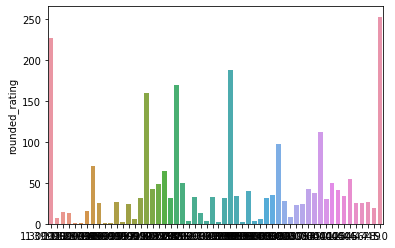

In [ ]:
import seaborn as sns

# Explore the rating score
x = df_fasttext['rounded_rating'].value_counts()
sns.barplot(x.index,x)

In [ ]:
df_fasttext = df_fasttext.drop(['Unnamed: 0'], axis=1).reset_index()

In [ ]:
#Setting the target variable as 1 and 0, 1 for rating >= 3.0 and 0 for rating <3.0
df_fasttext['Target'] = df_fasttext['rounded_rating'].apply(lambda x:1 if x>=3 else 0)
df_fasttext['Target'].value_counts()

1    1274
0    1155
Name: Target, dtype: int64

In [ ]:
#check for null values
df_fasttext.isnull().sum()/len(df_fasttext)*100

index              0.0
Business ID        0.0
review_content     0.0
rounded_rating     0.0
review_expanded    0.0
                  ... 
AWE297             0.0
AWE298             0.0
AWE299             0.0
AWE300             0.0
Target             0.0
Length: 313, dtype: float64

In [ ]:
df_fasttext.columns[12:]

Index(['AWE1', 'AWE2', 'AWE3', 'AWE4', 'AWE5', 'AWE6', 'AWE7', 'AWE8', 'AWE9',
       'AWE10',
       ...
       'AWE292', 'AWE293', 'AWE294', 'AWE295', 'AWE296', 'AWE297', 'AWE298',
       'AWE299', 'AWE300', 'Target'],
      dtype='object', length=301)

In [ ]:
from sklearn.model_selection import train_test_split

#train/test split (full feature set)

X_train, X_test, y_train, y_test = train_test_split(df_fasttext.drop(['Target'],axis =1).iloc[:, 12:], 
                                                    df_fasttext['Target'], stratify=df_fasttext['Target'],
                                                    test_size=0.2, random_state=101) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(X_train))
print("The shape of training/test feature set:", X_train.shape)
print("The length of testing  set:", len(X_test))

The length of training set: 1943
The shape of training/test feature set: (1943, 300)
The length of testing  set: 486


###SVM

####Full feature set

In [ ]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

def grid_search_SVM(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10) 
    grid_search = GridSearchCV(SVC(), param_grid, scoring=scorers, refit=refit_score,
                               cv=skf, return_train_score=True, n_jobs = -1, verbose =1)
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'poly']} 
%time grid_search_SVM(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.848
Best parameters set:
	C: 10
	gamma: 1
	kernel: 'rbf'
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       231
           1       0.89      0.77      0.83       255

    accuracy                           0.83       486
   macro avg       0.83      0.83      0.83       486
weighted avg       0.84      0.83      0.83       486

CPU times: user 2.27 s, sys: 185 ms, total: 2.45 s
Wall time: 2min 34s


In [ ]:
# Use the tuned hyper-parameter to fit the model
clf_svm = SVC(C = 10, gamma = 1, kernel = 'rbf')

%time clf_svm.fit (X_train, y_train)
print(clf_svm.score (X_test ,y_test))

y_predict = clf_svm.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 375 ms, sys: 2.24 ms, total: 378 ms
Wall time: 378 ms
0.8292181069958847


,Predicted Not Good,Predicted Good
True Not Good,206,25
True Good,58,197


In [ ]:
# append the result to performance table
fields = ['model', 'precision', 'recall', 'accuracy', 'f1','auc']
table_fasttext  = {}
scores = dict()

In [ ]:
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict),
          'auc': roc_auc_score(y_test, y_predict)}
table_fasttext['SVM with full fasttext feature set'] = scores

####With SVD

In [ ]:
# determine the number of SVD features to keep 
from sklearn.decomposition import TruncatedSVD

X = df_fasttext.drop(['Target'],axis =1).iloc[:, 12:]

var_explained = []
for i in range(2, 300):
  svd = TruncatedSVD(n_components= i)
  svd.fit(X) 
  var_explained.append(svd.explained_variance_ratio_.sum())
  if svd.explained_variance_ratio_.sum()>0.9:
    break

In [ ]:
#variance explained of the first 20 items
var_explained[:20]

[0.36540841220857173,
 0.44801514516130614,
 0.5133416842684984,
 0.5582516885609926,
 0.5938526076195915,
 0.6213142699574319,
 0.6458966056490831,
 0.6662257607784479,
 0.6847107436192513,
 0.7019547502811745,
 0.7170273673447936,
 0.7312391513880525,
 0.7443125889908889,
 0.7555274266363419,
 0.765901617278876,
 0.7757571073935834,
 0.7852712114841197,
 0.7941174629756468,
 0.8015615597129773,
 0.808714019850112]

In [ ]:
print("Variance Explained with 45 SVs:", var_explained[44]) 

#0.9 variance achieved with 45 dimensions

Variance Explained with 45 SVs: 0.901370451547181


In [ ]:
svd = TruncatedSVD(n_components= 45)
svd.fit(X)
X_svd = svd.transform(X)
X_svd.shape

(2429, 45)

In [ ]:
from sklearn.model_selection import train_test_split

# Test/train split (reduced feature set)
X_train_svd, X_test_svd, y_train_svd, y_test_svd = train_test_split(X_svd, 
                                                    df_fasttext['Target'], stratify=df_fasttext['Target'],
                                                    test_size=0.2, random_state=101) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(X_train_svd))
print("The shape of training/test feature set:", X_train_svd.shape)
print("The length of testing  set:", len(X_test_svd))

The length of training set: 1943
The shape of training/test feature set: (1943, 45)
The length of testing  set: 486


In [ ]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'poly']} 
%time grid_search_SVM(X_train_svd, X_test_svd, y_train_svd, y_test_svd, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.848
Best parameters set:
	C: 10
	gamma: 1
	kernel: 'rbf'
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       231
           1       0.89      0.77      0.82       255

    accuracy                           0.83       486
   macro avg       0.83      0.83      0.83       486
weighted avg       0.83      0.83      0.83       486

CPU times: user 1.32 s, sys: 159 ms, total: 1.48 s
Wall time: 1min 1s


In [ ]:
# Use the tuned hyper-parameter to fit the model
clf_svm_svd = SVC(C = 10, gamma = 1, kernel = 'rbf')

%time clf_svm_svd.fit (X_train_svd, y_train_svd)
print(clf_svm_svd.score (X_test_svd ,y_test_svd))

y_predict = clf_svm_svd.predict(X_test_svd)
pd.DataFrame(    
             confusion_matrix(y_test_svd, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 187 ms, sys: 0 ns, total: 187 ms
Wall time: 188 ms
0.8271604938271605


,Predicted Not Good,Predicted Good
True Not Good,206,25
True Good,59,196


In [ ]:
scores = {'precision': precision_score(y_test_svd, y_predict),
          'recall': recall_score(y_test_svd, y_predict),
          'accuracy':accuracy_score(y_test_svd, y_predict),
          'f1': f1_score(y_test_svd, y_predict),
          'auc': roc_auc_score(y_test_svd, y_predict)}
table_fasttext['SVM with TruncatedSVD Fasttext feature set'] = scores

###Gradient Boosting

####Full feature set

In [ ]:
# Explore Decision Tree basedline models based on the depth of the tree
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,20):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
    if tree_classifier.fit(X_train,y_train).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 0.7488236849061591
2 0.7302722706846418
3 0.7647872059212265
4 0.7678588421887391
5 0.7719640496960084
6 0.7642479513613534
7 0.7601480306634946
8 0.7493444356330954
9 0.7513930742796722
10 0.7400845889505684
11 0.7483108643933386
12 0.7457414750198256
13 0.7447026169706582
14 0.7406026962727994
15 0.7457414750198256


In [ ]:
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

for leafsize in range (20,40,5): # step is 5
    tree_classifier=tree.DecisionTreeClassifier(min_samples_leaf=leafsize,random_state=1)
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(leafsize, score)

20 0.7807031456515993
25 0.7812424002114724
30 0.7797012952683056
35 0.7745625165212793


In [ ]:
#Import Gradient boost classifier from Sklearn
from sklearn.ensemble import GradientBoostingClassifier

# Decision Tree Baseline Model; this is important to avoid overfitting of the tree
DTC = tree.DecisionTreeClassifier(min_samples_leaf =30, random_state = 23)

def grid_search_gradient_boost(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """   
    grad_boost = GradientBoostingClassifier(min_samples_leaf=30)
    grid_search = GridSearchCV(grad_boost, param_grid, scoring=scorers, refit=refit_score, 
                               cv=10, return_train_score=True, n_jobs = -1, verbose =1)
    
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 500],
    'max_features':['sqrt','log2']
}

%time grid_search_gradient_boost(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.873
Best parameters set:
	learning_rate: 0.1
	max_features: 'log2'
	n_estimators: 200
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       231
           1       0.86      0.86      0.86       255

    accuracy                           0.86       486
   macro avg       0.86      0.86      0.86       486
weighted avg       0.86      0.86      0.86       486

CPU times: user 3.13 s, sys: 236 ms, total: 3.36 s
Wall time: 4min 7s


In [ ]:
clf_grad_boosting = GradientBoostingClassifier(min_samples_leaf=30,
                                               n_estimators = 500, 
                                               learning_rate = 1, 
                                               max_features = 'sqrt',
                                               random_state = 2541) # add random state to control for reproducible output
%time clf_grad_boosting.fit(X_train,y_train)
# Predict Performance
print(clf_grad_boosting.score (X_test ,y_test))

y_predict = clf_grad_boosting.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 3.5 s, sys: 9.93 ms, total: 3.51 s
Wall time: 3.51 s
0.8683127572016461


,Predicted Not Good,Predicted Good
True Not Good,200,31
True Good,33,222


In [ ]:
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict),
          'auc': roc_auc_score(y_test, y_predict)}
table_fasttext['Gradient Boost with full Fasttext feature set'] = scores

####With SVD

In [ ]:
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,20):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
    if tree_classifier.fit(X_train_svd,y_train_svd).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_classifier,X_train_svd,y_train_svd,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 0.6737060533967751
2 0.6963071636267513
3 0.7323579169970923
4 0.736476341527888
5 0.7359238699444886
6 0.7348982289188475
7 0.7312820512820514
8 0.7246259582342057
9 0.71639703938673
10 0.7061141950832672
11 0.7076420830029078
12 0.6983743061062648
13 0.7066243721913825
14 0.6994078773460217


In [ ]:
# Use the minimal size per leaf
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

for leafsize in range (20,40,5): # step is 5
    tree_classifier=tree.DecisionTreeClassifier(min_samples_leaf=leafsize,random_state=1)
    score=np.mean(cross_val_score(tree_classifier,X_train_svd,y_train_svd,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(leafsize, score)

20 0.7323261961406292
25 0.727694951097013
30 0.7348982289188475
35 0.7436558287073751


In [ ]:
#choosing min_samples_leaf as 30 for this part
DTC = tree.DecisionTreeClassifier(min_samples_leaf = 20, random_state = 23)
param_grid = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 500],
    'max_features':['sqrt','log2']
}
%time grid_search_gradient_boost(X_train_svd, X_test_svd, y_train_svd, y_test_svd, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.848
Best parameters set:
	learning_rate: 0.1
	max_features: 'log2'
	n_estimators: 200
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       231
           1       0.86      0.84      0.85       255

    accuracy                           0.85       486
   macro avg       0.85      0.85      0.85       486
weighted avg       0.85      0.85      0.85       486

CPU times: user 2.31 s, sys: 200 ms, total: 2.51 s
Wall time: 2min 22s


In [ ]:
clf_grad_boosting = GradientBoostingClassifier(min_samples_leaf=20,
                                               n_estimators = 500, 
                                               learning_rate = 1, 
                                               max_features = 'log2',
                                               random_state = 2541) # add random state to control for reproducible output
%time clf_grad_boosting.fit(X_train_svd,y_train_svd)
# Predict Performance
print(clf_grad_boosting.score (X_test_svd ,y_test_svd))

y_predict = clf_grad_boosting.predict(X_test_svd)
pd.DataFrame(    
             confusion_matrix(y_test_svd, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 1.99 s, sys: 5.13 ms, total: 2 s
Wall time: 1.99 s
0.845679012345679


,Predicted Not Good,Predicted Good
True Not Good,193,38
True Good,37,218


In [ ]:
scores = {'precision': precision_score(y_test_svd, y_predict),
          'recall': recall_score(y_test_svd, y_predict),
          'accuracy':accuracy_score(y_test_svd, y_predict),
          'f1': f1_score(y_test_svd, y_predict),
          'auc': roc_auc_score(y_test_svd, y_predict)}
table_fasttext['Gradient Boosting with TruncatedSVD Fasttext feature set'] = scores

In [ ]:
fasttext_performance = pd.DataFrame(data = table_fasttext).T[['accuracy','recall', 'precision', 'f1','auc']]  # transpose and reorder the dataframe
fasttext_performance

,accuracy,recall,precision,f1,auc
SVM with full fasttext feature set,0.829218,0.772549,0.887387,0.825996,0.832162
SVM with TruncatedSVD Fasttext feature set,0.827160,0.768627,0.886878,0.823529,0.830201
Gradient Boost with full Fasttext feature set,0.868313,0.870588,0.877470,0.874016,0.868195
Gradient Boosting with TruncatedSVD Fasttext feature set,0.845679,0.854902,0.851562,0.853229,0.845200


##Glove vectors

###SVM

####Full feature set

In [ ]:
df_glove.head(3)

,Unnamed: 0,Business ID,review_content,rounded_rating,review_expanded,review_token,Potential_misspells,review_tagged,review_lemmas,review_norm,...,AWE91,AWE92,AWE93,AWE94,AWE95,AWE96,AWE97,AWE98,AWE99,AWE100
0,0,24-7-care-at-home-westminster-2,A great Home health service located right in t...,5.0,A great Home health service located right in t...,"['A', 'great', 'Home', 'health', 'service', 'l...","{'s', ':)', 'tv'}","[('A', 'DT'), ('great', 'JJ'), ('Home', 'NNP')...","['A', 'great', 'Home', 'health', 'service', 'l...","['great', 'home', 'health', 'service', 'locate...",...,-0.065254,-0.011395,0.119849,0.071879,-0.062794,-0.181202,0.008597,-0.208313,0.126262,-0.023945
1,1,4-ever-green-collective-riverside,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,5.0,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,"['4', 'EVER', 'GREEN', 'COLLECTIVE', '2781', '...","{'latez', 'jerkey', 'keef', '8th', 's', 'rubid...","[('4', 'CD'), ('EVER', 'NNP'), ('GREEN', 'NNP'...","['4', 'EVER', 'GREEN', 'COLLECTIVE', '2781', '...","['ever', 'green', 'collective', 'rubidoux', 'b...",...,-0.081501,0.100409,0.025377,0.006594,-0.139774,-0.083668,0.013225,-0.212144,0.141470,-0.017754
2,2,a-doctors-weight-loss-clinic-moreno-valley-2,Doctor Brysk and her staff is great. I have r...,4.5,Doctor Brysk and her staff is great. I have re...,"['Doctor', 'Brysk', 'and', 'her', 'staff', 'is...","{'isabell', 'dwlc', 'l', 'hcg', 's', 'lbs', 'a...","[('Doctor', 'NNP'), ('Brysk', 'NNP'), ('and', ...","['Doctor', 'Brysk', 'and', 'her', 'staff', 'be...","['doctor', 'brysk', 'staff', 'great', 'recomme...",...,-0.067142,0.026915,0.132370,0.033468,-0.140541,-0.123461,-0.029329,-0.181832,0.202332,-0.037064


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


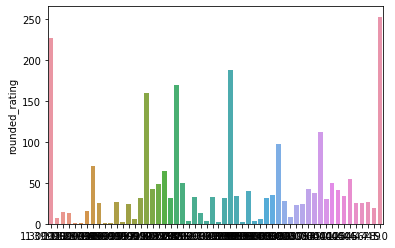

In [ ]:
import seaborn as sns

# Explore the rating score
x = df_glove['rounded_rating'].value_counts()
sns.barplot(x.index,x)

In [ ]:
#Setting the target variable as 1 and 0, 1 for rating >= 3.0 and 0 for rating <3.0
df_glove['Target'] = df_glove['rounded_rating'].apply(lambda x:1 if x>=3 else 0)
df_glove['Target'].value_counts()

1    1274
0    1155
Name: Target, dtype: int64

In [ ]:
#check for null values
df_glove.isnull().sum()/len(df_fasttext)*100

Unnamed: 0         0.0
Business ID        0.0
review_content     0.0
rounded_rating     0.0
review_expanded    0.0
                  ... 
AWE97              0.0
AWE98              0.0
AWE99              0.0
AWE100             0.0
Target             0.0
Length: 113, dtype: float64

In [ ]:
df_glove.columns[12:]

Index(['AWE1', 'AWE2', 'AWE3', 'AWE4', 'AWE5', 'AWE6', 'AWE7', 'AWE8', 'AWE9',
       'AWE10',
       ...
       'AWE92', 'AWE93', 'AWE94', 'AWE95', 'AWE96', 'AWE97', 'AWE98', 'AWE99',
       'AWE100', 'Target'],
      dtype='object', length=101)

In [ ]:
from sklearn.model_selection import train_test_split

#train/test split (full feature set)

X_train, X_test, y_train, y_test = train_test_split(df_glove.drop(['Target'],axis =1).iloc[:, 12:], 
                                                    df_glove['Target'], stratify=df_glove['Target'],
                                                    test_size=0.2, random_state=101) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(X_train))
print("The shape of training/test feature set:", X_train.shape)
print("The length of testing  set:", len(X_test))

The length of training set: 1943
The shape of training/test feature set: (1943, 100)
The length of testing  set: 486


In [ ]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

def grid_search_SVM(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10) 
    grid_search = GridSearchCV(SVC(), param_grid, scoring=scorers, refit=refit_score,
                               cv=skf, return_train_score=True, n_jobs = -1, verbose =1)
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'poly']} 
%time grid_search_SVM(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.873
Best parameters set:
	C: 10
	gamma: 0.1
	kernel: 'poly'
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       231
           1       0.89      0.85      0.87       255

    accuracy                           0.87       486
   macro avg       0.87      0.87      0.87       486
weighted avg       0.87      0.87      0.87       486

CPU times: user 1.33 s, sys: 112 ms, total: 1.44 s
Wall time: 1min 34s


In [ ]:
# Use the tuned hyper-parameter to fit the model
clf_svm = SVC(C = 10, gamma = 1, kernel = 'rbf')

%time clf_svm.fit (X_train, y_train)
print(clf_svm.score (X_test ,y_test))

y_predict = clf_svm.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 142 ms, sys: 1.97 ms, total: 144 ms
Wall time: 145 ms
0.8497942386831275


,Predicted Not Good,Predicted Good
True Not Good,197,34
True Good,39,216


In [ ]:
# append the result to performance table
fields = ['model', 'precision', 'recall', 'accuracy', 'f1','auc']
table_glove  = {}
scores = dict()

In [ ]:
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict),
          'auc': roc_auc_score(y_test, y_predict)}
table_glove['SVM with full glove feature set'] = scores

#### With SVD

In [ ]:
# determine the number of SVD features to keep 
from sklearn.decomposition import TruncatedSVD

X = df_glove.drop(['Target'],axis =1).iloc[:, 12:]

var_explained = []
for i in range(2,100):
  svd = TruncatedSVD(n_components= i)
  svd.fit(X) 
  var_explained.append(svd.explained_variance_ratio_.sum())
  if svd.explained_variance_ratio_.sum()>0.9:
    break

In [ ]:
#variance explained of the first 20 items
var_explained[:20]

[0.2603890218600863,
 0.34451232829778683,
 0.415629705819243,
 0.47496180375096686,
 0.5276729782303059,
 0.5646077247732345,
 0.600459311723883,
 0.6303848472192569,
 0.6561258342487739,
 0.6776074369870445,
 0.6967420024965651,
 0.7137208844435508,
 0.7297197120281456,
 0.7445126526599002,
 0.7583166704716183,
 0.7704582753293479,
 0.7817682114989516,
 0.7928895649139981,
 0.8035742599560111,
 0.8117178290656324]

In [ ]:
print("Variance Explained with 36 SVs:", var_explained[35]) 

#0.9 variance achieved with 36 dimensions

Variance Explained with 36 SVs: 0.9020734696274081


In [ ]:
svd = TruncatedSVD(n_components= 36)
svd.fit(X)
X_svd = svd.transform(X)
X_svd.shape

(2429, 36)

In [ ]:
from sklearn.model_selection import train_test_split

# Test/train split (reduced feature set)
X_train_svd, X_test_svd, y_train_svd, y_test_svd = train_test_split(X_svd, 
                                                    df_glove['Target'], stratify=df_glove['Target'],
                                                    test_size=0.2, random_state=101) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(X_train_svd))
print("The shape of training/test feature set:", X_train_svd.shape)
print("The length of testing  set:", len(X_test_svd))

The length of training set: 1943
The shape of training/test feature set: (1943, 36)
The length of testing  set: 486


In [ ]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'poly']} 
%time grid_search_SVM(X_train_svd, X_test_svd, y_train_svd, y_test_svd, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.871
Best parameters set:
	C: 10
	gamma: 0.1
	kernel: 'poly'
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       231
           1       0.88      0.84      0.86       255

    accuracy                           0.86       486
   macro avg       0.86      0.86      0.86       486
weighted avg       0.86      0.86      0.86       486

CPU times: user 1.26 s, sys: 227 ms, total: 1.49 s
Wall time: 1min 27s


In [ ]:
# Use the tuned hyper-parameter to fit the model
clf_svm_svd = SVC(C = 10, gamma = 0.1, kernel = 'poly')

%time clf_svm_svd.fit (X_train_svd, y_train_svd)
print(clf_svm_svd.score (X_test_svd ,y_test_svd))

y_predict = clf_svm_svd.predict(X_test_svd)
pd.DataFrame(    
             confusion_matrix(y_test_svd, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 85.5 ms, sys: 869 µs, total: 86.4 ms
Wall time: 86.7 ms
0.8559670781893004


,Predicted Not Good,Predicted Good
True Not Good,203,28
True Good,42,213


In [ ]:
scores = {'precision': precision_score(y_test_svd, y_predict),
          'recall': recall_score(y_test_svd, y_predict),
          'accuracy':accuracy_score(y_test_svd, y_predict),
          'f1': f1_score(y_test_svd, y_predict),
          'auc': roc_auc_score(y_test_svd, y_predict)}
table_glove['SVM with TruncatedSVD Glove feature set'] = scores

###Gradient Boosting

####Full feature set

In [ ]:
# Explore Decision Tree basedline models based on the depth of the tree
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,20):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
    if tree_classifier.fit(X_train,y_train).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 0.7822653978324081
2 0.7714644462067142
3 0.7868992862807296
4 0.7966851704996035
5 0.7992783505154639
6 0.7946471054718478
7 0.7884588950568332
8 0.785878932064499
9 0.7823314829500395
10 0.7725323817076394
11 0.7730399154110493
12 0.7735474491144594
13 0.7776738038593708
14 0.7797303727200633
15 0.7786994448850117
16 0.7802431932328838
17 0.7802431932328838


In [ ]:
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

for leafsize in range (20,40,5): # step is 5
    tree_classifier=tree.DecisionTreeClassifier(min_samples_leaf=leafsize,random_state=1)
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(leafsize, score)

20 0.800843246100978
25 0.794649748876553
30 0.7925905366111552
35 0.7951652127940788


In [ ]:
#Import Gradient boost classifier from Sklearn
from sklearn.ensemble import GradientBoostingClassifier

# Decision Tree Baseline Model; this is important to avoid overfitting of the tree
DTC = tree.DecisionTreeClassifier(min_samples_leaf =35, random_state = 23)

def grid_search_gradient_boost(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """   
    grad_boost = GradientBoostingClassifier(min_samples_leaf=35)
    grid_search = GridSearchCV(grad_boost, param_grid, scoring=scorers, refit=refit_score, 
                               cv=10, return_train_score=True, n_jobs = -1, verbose =1)
    
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 500],
    'max_features':['sqrt','log2']
}

%time grid_search_gradient_boost(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.871
Best parameters set:
	learning_rate: 0.1
	max_features: 'log2'
	n_estimators: 500
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       231
           1       0.85      0.85      0.85       255

    accuracy                           0.85       486
   macro avg       0.85      0.85      0.85       486
weighted avg       0.85      0.85      0.85       486

CPU times: user 3.82 s, sys: 158 ms, total: 3.98 s
Wall time: 2min 55s


In [ ]:
clf_grad_boosting = GradientBoostingClassifier(min_samples_leaf=35,
                                               n_estimators = 100, 
                                               learning_rate = 0.1, 
                                               max_features = 'sqrt',
                                               random_state = 2541) # add random state to control for reproducible output
%time clf_grad_boosting.fit(X_train,y_train)
# Predict Performance
print(clf_grad_boosting.score (X_test ,y_test))

y_predict = clf_grad_boosting.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 682 ms, sys: 1.89 ms, total: 684 ms
Wall time: 684 ms
0.8374485596707819


,Predicted Not Good,Predicted Good
True Not Good,193,38
True Good,41,214


In [ ]:
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict),
          'auc': roc_auc_score(y_test, y_predict)}
table_glove['Gradient Boost with full Glove feature set'] = scores

####With SVD

In [ ]:
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,20):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
    if tree_classifier.fit(X_train_svd,y_train_svd).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_classifier,X_train_svd,y_train_svd,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 0.7879355009251917
2 0.7879355009251917
3 0.7961749933914882
4 0.8116204070843246
5 0.8075099127676447
6 0.7931060005286809
7 0.7838408670367433
8 0.7879566481628337
9 0.7833254031192175
10 0.7750938408670367
11 0.7725350251123446
12 0.775096484271742
13 0.7720063441712925
14 0.7683980967486121
15 0.7725191646841131
16 0.7699418450964842


In [ ]:
# Use the minimal size per leaf
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

for leafsize in range (20,40,5): # step is 5
    tree_classifier=tree.DecisionTreeClassifier(min_samples_leaf=leafsize,random_state=1)
    score=np.mean(cross_val_score(tree_classifier,X_train_svd,y_train_svd,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(leafsize, score)

20 0.8095664816283372
25 0.8188289717155696
30 0.8100978059740946
35 0.8064842717420037


In [ ]:
#choosing min_samples_leaf as 30 for this part
DTC = tree.DecisionTreeClassifier(min_samples_leaf = 35, random_state = 23)
param_grid = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 500],
    'max_features':['sqrt','log2']
}
%time grid_search_gradient_boost(X_train_svd, X_test_svd, y_train_svd, y_test_svd, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.863
Best parameters set:
	learning_rate: 0.1
	max_features: 'sqrt'
	n_estimators: 200
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       231
           1       0.86      0.84      0.85       255

    accuracy                           0.85       486
   macro avg       0.85      0.85      0.85       486
weighted avg       0.85      0.85      0.85       486

CPU times: user 2.39 s, sys: 175 ms, total: 2.56 s
Wall time: 2min 20s


In [ ]:
clf_grad_boosting = GradientBoostingClassifier(min_samples_leaf=35,
                                               n_estimators = 200, 
                                               learning_rate = 0.1, 
                                               max_features = 'log2',
                                               random_state = 2541) # add random state to control for reproducible output
%time clf_grad_boosting.fit(X_train_svd,y_train_svd)
# Predict Performance
print(clf_grad_boosting.score (X_test_svd ,y_test_svd))

y_predict = clf_grad_boosting.predict(X_test_svd)
pd.DataFrame(    
             confusion_matrix(y_test_svd, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 806 ms, sys: 1.34 ms, total: 807 ms
Wall time: 803 ms
0.8539094650205762


,Predicted Not Good,Predicted Good
True Not Good,200,31
True Good,40,215


In [ ]:
scores = {'precision': precision_score(y_test_svd, y_predict),
          'recall': recall_score(y_test_svd, y_predict),
          'accuracy':accuracy_score(y_test_svd, y_predict),
          'f1': f1_score(y_test_svd, y_predict),
          'auc': roc_auc_score(y_test_svd, y_predict)}
table_glove['Gradient Boosting with TruncatedSVD Glove feature set'] = scores

In [ ]:
glove_performance = pd.DataFrame(data = table_glove).T[['accuracy','recall', 'precision', 'f1','auc']]  # transpose and reorder the dataframe
glove_performance

,accuracy,recall,precision,f1,auc
SVM with full glove feature set,0.849794,0.847059,0.864000,0.855446,0.849936
SVM with TruncatedSVD Glove feature set,0.855967,0.835294,0.883817,0.858871,0.857041
Gradient Boost with full Glove feature set,0.837449,0.839216,0.849206,0.844181,0.837357
Gradient Boosting with TruncatedSVD Glove feature set,0.853909,0.843137,0.873984,0.858283,0.854469


#Topic Vectors

In [9]:
df_topic = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/business_topicvector.csv')

In [10]:
df_topic

,Unnamed: 0,Business ID,rounded_rating,TD1,TD2,TD3,TD4,TD5,TD6,TD7,TD8,TD9
0,0,24-7-care-at-home-westminster-2,5.0,0.297569,0.254693,0.335467,0.004712,0.005008,0.008364,0.032568,0.003042,0.058577
1,1,4-ever-green-collective-riverside,5.0,0.219003,0.170542,0.439515,0.007690,0.007584,0.007888,0.063191,0.014732,0.069855
2,2,a-doctors-weight-loss-clinic-moreno-valley-2,4.5,0.247202,0.183562,0.377233,0.009746,0.008352,0.007634,0.072140,0.014723,0.079408
3,3,a-gobaud-orthopaedic-medical-clnc-and-bck-trtm...,1.0,0.080379,0.284567,0.318722,0.008281,0.008831,0.009181,0.042936,0.005365,0.241737
4,4,a-healing-within-palm-desert,4.0,0.208102,0.241902,0.370235,0.015115,0.007527,0.012299,0.058872,0.032510,0.053438
...,...,...,...,...,...,...,...,...,...,...,...,...
2410,2410,yusufaly-imdad-md-wildomar,3.9,0.174496,0.269782,0.406590,0.011373,0.009224,0.013559,0.041304,0.004758,0.068913
2411,2411,yvonne-d-sylva-md-corona,3.1,0.150536,0.222321,0.366059,0.009200,0.055729,0.006500,0.091461,0.007970,0.090224
2412,2412,zacher-judith-md-palm-desert,4.0,0.246399,0.178942,0.373533,0.007191,0.007651,0.031073,0.050528,0.038197,0.066484
2413,2413,zeid-k-kayali-md-rialto-2,2.4,0.146350,0.260861,0.376575,0.011320,0.006614,0.005551,0.078021,0.003222,0.111487


In [11]:
df_topic.shape

(2415, 12)

In [ ]:
df_topic = df_topic.drop(['Unnamed: 0'], axis=1).reset_index()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


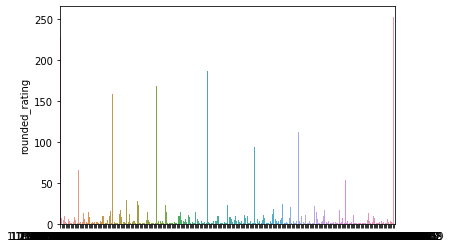

In [ ]:
import seaborn as sns

# Explore the rating score
x = df_topic['rounded_rating'].value_counts()
sns.barplot(x.index,x)

In [ ]:
#Setting the target variable as 1 and 0, 1 for rating >= 3.0 and 0 for rating <3.0
df_topic['Target'] = df_topic['rounded_rating'].apply(lambda x:1 if x>=3 else 0)
df_topic['Target'].value_counts()

1    1268
0    1147
Name: Target, dtype: int64

In [ ]:
df_topic.columns

Index(['index', 'Business ID ', 'rounded_rating', 'TD1', 'TD2', 'TD3', 'TD4',
       'TD5', 'TD6', 'TD7', 'TD8', 'TD9', 'Target'],
      dtype='object')

##SVM

In [ ]:
from sklearn.model_selection import train_test_split

#train/test split (full feature set)

X_train, X_test, y_train, y_test = train_test_split(df_topic.drop(['Target'],axis =1).iloc[:, 3:], 
                                                    df_topic['Target'], stratify=df_topic['Target'],
                                                    test_size=0.2, random_state=101) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(X_train))
print("The shape of training/test feature set:", X_train.shape)
print("The length of testing  set:", len(X_test))

The length of training set: 1932
The shape of training/test feature set: (1932, 9)
The length of testing  set: 483


In [ ]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

def grid_search_SVM(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10) 
    grid_search = GridSearchCV(SVC(), param_grid, scoring=scorers, refit=refit_score,
                               cv=skf, return_train_score=True, n_jobs = -1, verbose =1)
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'poly']} 
%time grid_search_SVM(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.883
Best parameters set:
	C: 10
	gamma: 1
	kernel: 'poly'
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       229
           1       0.85      0.82      0.83       254

    accuracy                           0.83       483
   macro avg       0.83      0.83      0.83       483
weighted avg       0.83      0.83      0.83       483

CPU times: user 895 ms, sys: 61.9 ms, total: 957 ms
Wall time: 37.5 s


In [ ]:
# Use the tuned hyper-parameter to fit the model
clf_svm = SVC(C = 10, gamma = 1, kernel = 'rbf')

%time clf_svm.fit (X_train, y_train)
print(clf_svm.score (X_test ,y_test))

y_predict = clf_svm.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 85.9 ms, sys: 0 ns, total: 85.9 ms
Wall time: 85.2 ms
0.8302277432712215


,Predicted Not Good,Predicted Good
True Not Good,191,38
True Good,44,210


In [ ]:
# append the result to performance table
fields = ['model', 'precision', 'recall', 'accuracy', 'f1','auc']
table_topic  = {}
scores = dict()

In [ ]:
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict),
          'auc': roc_auc_score(y_test, y_predict)}
table_topic['SVM with full topic feature set'] = scores

##Gradient Boosting

In [ ]:
# Explore Decision Tree basedline models based on the depth of the tree
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,20):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
    if tree_classifier.fit(X_train,y_train).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 0.8566342609903318
2 0.8566342609903318
3 0.8581726403504086
4 0.8623177180706157
5 0.860242508413012
6 0.8535120987126756
7 0.8498904973024946
8 0.8498931680999947
9 0.8405747556220288
10 0.8312563431440628
11 0.8322952833716147
12 0.8266118262913306
13 0.8266064846963304
14 0.828160888841408
15 0.8297152929864857


In [ ]:
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

for leafsize in range (20,40,5): # step is 5
    tree_classifier=tree.DecisionTreeClassifier(min_samples_leaf=leafsize,random_state=1)
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(leafsize, score)

20 0.8618049249505901
25 0.8649137332407456
30 0.8680091875434005
35 0.8571523957053577


In [ ]:
#Import Gradient boost classifier from Sklearn
from sklearn.ensemble import GradientBoostingClassifier

# Decision Tree Baseline Model; this is important to avoid overfitting of the tree
DTC = tree.DecisionTreeClassifier(min_samples_leaf =35, random_state = 23)

def grid_search_gradient_boost(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """   
    grad_boost = GradientBoostingClassifier(min_samples_leaf=35)
    grid_search = GridSearchCV(grad_boost, param_grid, scoring=scorers, refit=refit_score, 
                               cv=10, return_train_score=True, n_jobs = -1, verbose =1)
    
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 500],
    'max_features':['sqrt','log2']
}

%time grid_search_gradient_boost(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.881
Best parameters set:
	learning_rate: 0.01
	max_features: 'log2'
	n_estimators: 500
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       229
           1       0.85      0.83      0.84       254

    accuracy                           0.83       483
   macro avg       0.83      0.83      0.83       483
weighted avg       0.84      0.83      0.83       483

CPU times: user 2.41 s, sys: 99.7 ms, total: 2.51 s
Wall time: 1min 28s


In [ ]:
clf_grad_boosting = GradientBoostingClassifier(min_samples_leaf=35,
                                               n_estimators = 100, 
                                               learning_rate = 0.1, 
                                               max_features = 'sqrt',
                                               random_state = 2541) # add random state to control for reproducible output
%time clf_grad_boosting.fit(X_train,y_train)
# Predict Performance
print(clf_grad_boosting.score (X_test ,y_test))

y_predict = clf_grad_boosting.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 269 ms, sys: 0 ns, total: 269 ms
Wall time: 270 ms
0.8405797101449275


,Predicted Not Good,Predicted Good
True Not Good,193,36
True Good,41,213


In [ ]:
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict),
          'auc': roc_auc_score(y_test, y_predict)}
table_topic['Gradient Boost with full Topic feature set'] = scores

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

def grid_search_logistic_regression(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10,  random_state = 4561, shuffle=True) 
    logreg = LogisticRegression(max_iter = 500)
    grid_search = GridSearchCV(logreg, param_grid, scoring=scorers, refit=refit_score, 
                               cv=skf, return_train_score=True, n_jobs = -1, verbose =1)
    
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
param_grid = {"C":[0.1, 1, 10], 
              "penalty":["l1","l2"]}

%time grid_search_logistic_regression(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best score: 0.884
Best parameters set:
	C: 10
	penalty: 'l2'
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       229
           1       0.84      0.82      0.83       254

    accuracy                           0.83       483
   macro avg       0.83      0.83      0.83       483
weighted avg       0.83      0.83      0.83       483

CPU times: user 136 ms, sys: 64 ms, total: 200 ms
Wall time: 776 ms


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

In [ ]:
# Use the tuned hyper-parameter to fit the model
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(penalty= 'l2', C = 10)

%time clf_lr.fit (X_train, y_train)
print(clf_lr.score (X_test ,y_test))

y_predict = clf_lr.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 41.6 ms, sys: 28.1 ms, total: 69.7 ms
Wall time: 36.2 ms
0.8260869565217391


,Predicted Not Good,Predicted Good
True Not Good,190,39
True Good,45,209


In [ ]:
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict),
          'auc': roc_auc_score(y_test, y_predict)}
table_topic['Logistic Regression with full Topic feature set'] = scores

In [ ]:
topic_performance = pd.DataFrame(data = table_topic).T[['accuracy','recall', 'precision', 'f1','auc']]  # transpose and reorder the dataframe
topic_performance

,accuracy,recall,precision,f1,auc
SVM with full topic feature set,0.830228,0.826772,0.846774,0.836653,0.830416
Gradient Boost with full Topic feature set,0.840580,0.838583,0.855422,0.846918,0.840689
Logistic Regression with full Topic feature set,0.826087,0.822835,0.842742,0.832669,0.826264


#Knowledge Driven Approach

In [12]:
df_sentiment = pd.read_excel('/content/drive/MyDrive/Data/sentiment_analysis.xlsx')

In [13]:
df_sentiment.head(3)

,Unnamed: 0,Business ID,Name,Business Category,Address,City,State code,zip code,rounded_rating,review_content,Review_expanded,polarity,subjectivity,NLTK_Compound
0,0,24-7-care-at-home-westminster-2,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...","13800 Arizona StSte 200Westminster, CA 92683",Westminster,CA,92683,5.0,A great Home health service located right in t...,A great Home health service located right in t...,0.364055,0.584335,0.9998
1,1,4-ever-green-collective-riverside,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...","2781 Rubidoux BlvdRiverside, CA 92509",Riverside,CA,92509,5.0,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,0.209013,0.530690,0.9994
2,2,a-doctors-weight-loss-clinic-moreno-valley-2,Doctor's Weight Loss Clinic,"Doctorsphysicians,","23318 Olivewood Plaza DrMoreno Valley, CA 92553",Moreno Valley,CA,92553,4.5,Doctor Brysk and her staff is great. I have r...,Doctor Brysk and her staff is great. I have re...,0.267169,0.556652,0.9993


In [14]:
df_sentiment.shape

(2466, 14)

In [ ]:
df_sentiment = df_sentiment.drop(['Unnamed: 0'], axis=1).reset_index()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


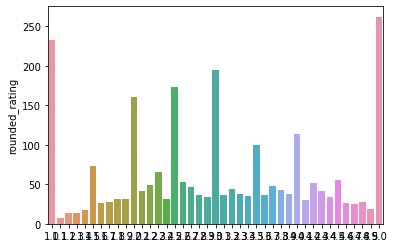

In [ ]:
import seaborn as sns

# Explore the rating score
x = df_sentiment['rounded_rating'].value_counts()
sns.barplot(x.index,x)

In [ ]:
#Setting the target variable as 1 and 0, 1 for rating >= 3.0 and 0 for rating <3.0
df_sentiment['Target'] = df_sentiment['rounded_rating'].apply(lambda x:1 if x>=3 else 0)
df_sentiment['Target'].value_counts()

1    1297
0    1169
Name: Target, dtype: int64

In [ ]:
df_sentiment.columns[11:]

Index(['polarity', 'subjectivity', 'NLTK_Compound', 'Target'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

#train/test split (full feature set)

X_train, X_test, y_train, y_test = train_test_split(df_sentiment.drop(['Target'],axis =1).iloc[:, 11:], 
                                                    df_sentiment['Target'], stratify=df_sentiment['Target'],
                                                    test_size=0.2, random_state=101) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(X_train))
print("The shape of training/test feature set:", X_train.shape)
print("The length of testing  set:", len(X_test))

The length of training set: 1972
The shape of training/test feature set: (1972, 3)
The length of testing  set: 494


##SVM

In [ ]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
}

def grid_search_SVM(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10) 
    grid_search = GridSearchCV(SVC(), param_grid, scoring=scorers, refit=refit_score,
                               cv=skf, return_train_score=True, n_jobs = -1, verbose =1)
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'poly']} 
%time grid_search_SVM(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.867
Best parameters set:
	C: 1
	gamma: 1
	kernel: 'poly'
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       234
           1       0.91      0.82      0.86       260

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.87      0.86      0.86       494

CPU times: user 801 ms, sys: 68 ms, total: 868 ms
Wall time: 33.5 s


In [ ]:
# Use the tuned hyper-parameter to fit the model
clf_svm = SVC(C = 1, gamma = 1, kernel = 'poly')

%time clf_svm.fit (X_train, y_train)
print(clf_svm.score (X_test ,y_test))

y_predict = clf_svm.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 52.1 ms, sys: 39 µs, total: 52.2 ms
Wall time: 52 ms
0.8623481781376519


,Predicted Not Good,Predicted Good
True Not Good,212,22
True Good,46,214


In [ ]:
# append the result to performance table
fields = ['model', 'precision', 'recall', 'accuracy', 'f1','auc']
table_sentiment  = {}
scores = dict()

In [ ]:
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict),
          'auc': roc_auc_score(y_test, y_predict)}
table_sentiment['SVM with full sentiment feature set'] = scores

##Gradient Boosting

In [ ]:
# Explore Decision Tree basedline models based on the depth of the tree
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,20):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
    if tree_classifier.fit(X_train,y_train).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 0.8554965902681639
2 0.8544813618417679
3 0.8555017176844588
4 0.852958519202174
5 0.8377429113469722
6 0.8428241808952468
7 0.8402963646618469
8 0.8321694098343844
9 0.8245680151771522
10 0.8205096651797159
11 0.8169538019791828
12 0.8139158078244375
13 0.8118827872634979
14 0.8113700456340052
15 0.8113854278828899
16 0.8052914936163666
17 0.8047710608624314
18 0.8057888529969748
19 0.8047838794031688


In [ ]:
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

for leafsize in range (20,40,5): # step is 5
    tree_classifier=tree.DecisionTreeClassifier(min_samples_leaf=leafsize,random_state=1)
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(leafsize, score)

20 0.8443393324103983
25 0.8473875813977336
30 0.8544813618417679
35 0.8524611598215659


In [ ]:
#Import Gradient boost classifier from Sklearn
from sklearn.ensemble import GradientBoostingClassifier

# Decision Tree Baseline Model; this is important to avoid overfitting of the tree
DTC = tree.DecisionTreeClassifier(min_samples_leaf =30, random_state = 23)

def grid_search_gradient_boost(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """   
    grad_boost = GradientBoostingClassifier(min_samples_leaf=30)
    grid_search = GridSearchCV(grad_boost, param_grid, scoring=scorers, refit=refit_score, 
                               cv=10, return_train_score=True, n_jobs = -1, verbose =1)
    
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 500],
    'max_features':['sqrt','log2']
}

%time grid_search_gradient_boost(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.860
Best parameters set:
	learning_rate: 0.01
	max_features: 'log2'
	n_estimators: 200
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       234
           1       0.90      0.83      0.86       260

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494

CPU times: user 1.12 s, sys: 96.2 ms, total: 1.21 s
Wall time: 51 s


In [ ]:
clf_grad_boosting = GradientBoostingClassifier(min_samples_leaf=30,
                                               n_estimators = 100, 
                                               learning_rate = 0.01, 
                                               max_features = 'sqrt',
                                               random_state = 2541) # add random state to control for reproducible output
%time clf_grad_boosting.fit(X_train,y_train)
# Predict Performance
print(clf_grad_boosting.score (X_test ,y_test))

y_predict = clf_grad_boosting.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 150 ms, sys: 0 ns, total: 150 ms
Wall time: 152 ms
0.8603238866396761


,Predicted Not Good,Predicted Good
True Not Good,212,22
True Good,47,213


In [ ]:
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict),
          'auc': roc_auc_score(y_test, y_predict)}
table_sentiment['Gradient Boost with full sentiment feature set'] = scores

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

def grid_search_logistic_regression(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10,  random_state = 4561, shuffle=True) 
    logreg = LogisticRegression(max_iter = 500)
    grid_search = GridSearchCV(logreg, param_grid, scoring=scorers, refit=refit_score, 
                               cv=skf, return_train_score=True, n_jobs = -1, verbose =1)
    
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
param_grid = {"C":[0.1, 1, 10], 
              "penalty":["l1","l2"]}

%time grid_search_logistic_regression(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best score: 0.862
Best parameters set:
	C: 10
	penalty: 'l2'
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       234
           1       0.88      0.84      0.86       260

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.86      0.85      0.85       494

CPU times: user 95.2 ms, sys: 4.11 ms, total: 99.3 ms
Wall time: 577 ms


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

In [ ]:
# Use the tuned hyper-parameter to fit the model
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(penalty= 'l2', C = 10)

%time clf_lr.fit (X_train, y_train)
print(clf_lr.score (X_test ,y_test))

y_predict = clf_lr.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 17.1 ms, sys: 0 ns, total: 17.1 ms
Wall time: 18.1 ms
0.854251012145749


,Predicted Not Good,Predicted Good
True Not Good,203,31
True Good,41,219


In [ ]:
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict),
          'auc': roc_auc_score(y_test, y_predict)}
table_sentiment['Logistic Regression with full sentiment feature set'] = scores

In [ ]:
sentiment_performance = pd.DataFrame(data = table_sentiment).T[['accuracy','recall', 'precision', 'f1','auc']]  # transpose and reorder the dataframe
sentiment_performance

,accuracy,recall,precision,f1,auc
SVM with full sentiment feature set,0.862348,0.823077,0.906780,0.862903,0.864530
Gradient Boost with full sentiment feature set,0.860324,0.819231,0.906383,0.860606,0.862607
Logistic Regression with full sentiment feature set,0.854251,0.842308,0.876000,0.858824,0.854915


#BOW

In [15]:
df_bow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/business_bow.csv')

In [ ]:
df_bow.head(3)

,Unnamed: 0,Business ID,review_content,rounded_rating,review_expanded,review_token,Potential_misspells,review_tagged,review_lemmas,review_norm,...,glass,car,behind,practitioner,grateful,loma,mri,discharge,free,hurt
0,0,24-7-care-at-home-westminster-2,A great Home health service located right in t...,5.0,A great Home health service located right in t...,"['A', 'great', 'Home', 'health', 'service', 'l...","{'tv', ':)', 's'}","[('A', 'DT'), ('great', 'JJ'), ('Home', 'NNP')...","['A', 'great', 'Home', 'health', 'service', 'l...","['great', 'home', 'health', 'service', 'locate...",...,0,6,0,0,0,0,0,0,0,0
1,1,4-ever-green-collective-riverside,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,5.0,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,"['4', 'EVER', 'GREEN', 'COLLECTIVE', '2781', '...","{'"",', '8th', ',(', '.""', 'trainwreck', ',""', ...","[('4', 'CD'), ('EVER', 'NNP'), ('GREEN', 'NNP'...","['4', 'EVER', 'GREEN', 'COLLECTIVE', '2781', '...","['ever', 'green', 'collective', 'rubidoux', 'b...",...,2,1,0,0,0,0,0,0,2,0
2,2,a-doctors-weight-loss-clinic-moreno-valley-2,Doctor Brysk and her staff is great. I have r...,4.5,Doctor Brysk and her staff is great. I have re...,"['Doctor', 'Brysk', 'and', 'her', 'staff', 'is...","{'g', 'dwlc', 'bplood', '.""', 'murrietta', 'sa...","[('Doctor', 'NNP'), ('Brysk', 'NNP'), ('and', ...","['Doctor', 'Brysk', 'and', 'her', 'staff', 'be...","['doctor', 'brysk', 'staff', 'great', 'recomme...",...,0,2,0,0,0,0,0,0,0,0


In [16]:
df_bow.shape

(2429, 517)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


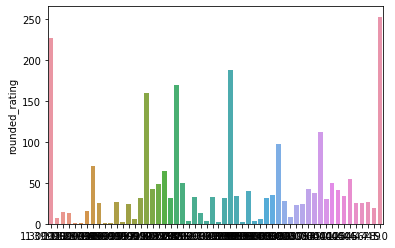

In [ ]:
import seaborn as sns

# Explore the rating score
x = df_bow['rounded_rating'].value_counts()
sns.barplot(x.index,x)

In [ ]:
#Setting the target variable as 1 and 0, 1 for rating >= 3.0 and 0 for rating <3.0
df_bow['Target'] = df_bow['rounded_rating'].apply(lambda x:1 if x>=3 else 0)
df_bow['Target'].value_counts()

1    1274
0    1155
Name: Target, dtype: int64

In [ ]:
df_bow.columns[17:]

Index(['get', 'doctor', 'time', 'care', 'would', 'staff', 'see', 'call',
       'office', 'wait',
       ...
       'car', 'behind', 'practitioner', 'grateful', 'loma', 'mri', 'discharge',
       'free', 'hurt', 'Target'],
      dtype='object', length=501)

In [ ]:
df_bow = df_bow.drop(['Unnamed: 0'], axis=1).reset_index()

In [ ]:
from sklearn.model_selection import train_test_split

#train/test split (full feature set)

X_train, X_test, y_train, y_test = train_test_split(df_bow.drop(['Target'],axis =1).iloc[:, 17:], 
                                                    df_bow['Target'], stratify=df_bow['Target'],
                                                    test_size=0.2, random_state=101) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(X_train))
print("The shape of training/test feature set:", X_train.shape)
print("The length of testing  set:", len(X_test))

The length of training set: 1943
The shape of training/test feature set: (1943, 500)
The length of testing  set: 486


##SVM

###Full feature set

In [ ]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
}

def grid_search_SVM(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10) 
    grid_search = GridSearchCV(SVC(), param_grid, scoring=scorers, refit=refit_score,
                               cv=skf, return_train_score=True, n_jobs = -1, verbose =1)
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'poly']} 
%time grid_search_SVM(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.812
Best parameters set:
	C: 10
	gamma: 0.01
	kernel: 'poly'
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       231
           1       0.81      0.82      0.81       255

    accuracy                           0.80       486
   macro avg       0.80      0.80      0.80       486
weighted avg       0.80      0.80      0.80       486

CPU times: user 3.05 s, sys: 329 ms, total: 3.38 s
Wall time: 3min 56s


In [ ]:
# Use the tuned hyper-parameter to fit the model
clf_svm = SVC(C = 10, gamma = 0.01, kernel = 'poly')

%time clf_svm.fit (X_train, y_train)
print(clf_svm.score (X_test ,y_test))

y_predict = clf_svm.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 681 ms, sys: 2.94 ms, total: 684 ms
Wall time: 684 ms
0.8024691358024691


,Predicted Not Good,Predicted Good
True Not Good,181,50
True Good,46,209


In [ ]:
# append the result to performance table
fields = ['model', 'precision', 'recall', 'accuracy', 'f1','auc']
table_bow  = {}
scores = dict()

In [ ]:
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict),
          'auc': roc_auc_score(y_test, y_predict)}
table_bow['SVM with full sentiment feature set'] = scores

###With SVD

In [ ]:
df_bow.shape

(2429, 518)

In [ ]:
# determine the number of SVD features to keep 
from sklearn.decomposition import TruncatedSVD

X = df_bow.drop(['Target'],axis =1).iloc[:, 17:]

var_explained = []
for i in range(2, 500):
  svd = TruncatedSVD(n_components= i)
  svd.fit(X) 
  var_explained.append(svd.explained_variance_ratio_.sum())
  if svd.explained_variance_ratio_.sum()>0.9:
    break

In [ ]:
#variance explained of the first 20 items
var_explained[:20]

[0.872476041500775, 0.8935685347550621, 0.9094948165519455]

In [ ]:
print("Variance Explained with 3 SVs:", var_explained[2]) 

#0.6 variance achieved with 3 dimensions

Variance Explained with 3 SVs: 0.9094948165519455


In [ ]:
svd = TruncatedSVD(n_components= 3)
svd.fit(X)
X_svd = svd.transform(X)
X_svd.shape

(2429, 3)

In [ ]:
from sklearn.model_selection import train_test_split

# Test/train split (reduced feature set)
X_train_svd, X_test_svd, y_train_svd, y_test_svd = train_test_split(X_svd, 
                                                    df_bow['Target'], stratify=df_bow['Target'],
                                                    test_size=0.2, random_state=101) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print("The length of training set:", len(X_train_svd))
print("The shape of training/test feature set:", X_train_svd.shape)
print("The length of testing  set:", len(X_test_svd))

The length of training set: 1943
The shape of training/test feature set: (1943, 3)
The length of testing  set: 486


In [ ]:
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
%time grid_search_SVM(X_train_svd, X_test_svd, y_train_svd, y_test_svd, param_grid)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best score: 0.680
Best parameters set:
	C: 1
	gamma: 0.1
	kernel: 'rbf'
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       231
           1       0.67      0.73      0.70       255

    accuracy                           0.67       486
   macro avg       0.67      0.67      0.67       486
weighted avg       0.67      0.67      0.67       486

CPU times: user 468 ms, sys: 64.8 ms, total: 533 ms
Wall time: 13.8 s


In [ ]:
# Use the tuned hyper-parameter to fit the model
clf_svm_svd = SVC(C = 1, gamma = 0.1, kernel = 'rbf')

%time clf_svm_svd.fit (X_train_svd, y_train_svd)
print(clf_svm_svd.score (X_test_svd ,y_test_svd))

y_predict = clf_svm_svd.predict(X_test_svd)
pd.DataFrame(    
             confusion_matrix(y_test_svd, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 204 ms, sys: 0 ns, total: 204 ms
Wall time: 204 ms
0.6728395061728395


,Predicted Not Good,Predicted Good
True Not Good,141,90
True Good,69,186


In [ ]:
scores = {'precision': precision_score(y_test_svd, y_predict),
          'recall': recall_score(y_test_svd, y_predict),
          'accuracy':accuracy_score(y_test_svd, y_predict),
          'f1': f1_score(y_test_svd, y_predict),
          'auc':roc_auc_score(y_test_svd, y_predict)}
table_bow['SVM with TruncatedSVD bow feature set'] = scores

##Gradient Boosting

###Full feature set

In [ ]:
# Explore Decision Tree basedline models based on the depth of the tree
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,20):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
    if tree_classifier.fit(X_train,y_train).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 0.6443616177636795
2 0.7004758128469468
3 0.712305048902987
4 0.7241289981496168
5 0.7153793285752049
6 0.7313217023526303
7 0.735471847739889
8 0.732862807295797
9 0.7313428495902723
10 0.7292624900872323
11 0.7225799629923341
12 0.7174041765794342
13 0.7199735659529474
14 0.7261538461538463
15 0.7277055247158339
16 0.7204784562516522
17 0.7318028020089876
18 0.7215278879196404
19 0.7241237113402063


In [ ]:
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

for leafsize in range (20,40,5): # step is 5
    tree_classifier=tree.DecisionTreeClassifier(min_samples_leaf=leafsize,random_state=1)
    score=np.mean(cross_val_score(tree_classifier,X_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(leafsize, score)

20 0.7287470261697067
25 0.7364419772667196
30 0.7338884483214381
35 0.7349246629659001


In [ ]:
#Import Gradient boost classifier from Sklearn
from sklearn.ensemble import GradientBoostingClassifier

# Decision Tree Baseline Model; this is important to avoid overfitting of the tree
DTC = tree.DecisionTreeClassifier(min_samples_leaf =25, random_state = 23)

def grid_search_gradient_boost(X_train, X_test, y_train, y_test, param_grid, refit_score='accuracy_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """   
    grad_boost = GradientBoostingClassifier(min_samples_leaf=25)
    grid_search = GridSearchCV(grad_boost, param_grid, scoring=scorers, refit=refit_score, 
                               cv=10, return_train_score=True, n_jobs = -1, verbose =1)
    
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 500],
    'max_features':['sqrt','log2']
}

%time grid_search_gradient_boost(X_train, X_test, y_train, y_test, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.869
Best parameters set:
	learning_rate: 0.1
	max_features: 'sqrt'
	n_estimators: 500
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       231
           1       0.86      0.87      0.87       255

    accuracy                           0.86       486
   macro avg       0.86      0.86      0.86       486
weighted avg       0.86      0.86      0.86       486

CPU times: user 2.92 s, sys: 145 ms, total: 3.07 s
Wall time: 1min 33s


In [ ]:
clf_grad_boosting = GradientBoostingClassifier(min_samples_leaf=25,
                                               n_estimators = 500, 
                                               learning_rate = 0.1, 
                                               max_features = 'log2',
                                               random_state = 2541) # add random state to control for reproducible output
%time clf_grad_boosting.fit(X_train,y_train)
# Predict Performance
print(clf_grad_boosting.score (X_test ,y_test))

y_predict = clf_grad_boosting.predict(X_test)
pd.DataFrame(    
             confusion_matrix(y_test, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 945 ms, sys: 6.47 ms, total: 951 ms
Wall time: 949 ms
0.8621399176954733


,Predicted Not Good,Predicted Good
True Not Good,195,36
True Good,31,224


In [ ]:
scores = {'precision': precision_score(y_test, y_predict),
          'recall': recall_score(y_test, y_predict),
          'accuracy':accuracy_score(y_test, y_predict),
          'f1': f1_score(y_test, y_predict),
          'auc': roc_auc_score(y_test,y_predict)}
table_bow['Gradient Boost with full bow feature set'] = scores

###With SVD

In [ ]:
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,20):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
    if tree_classifier.fit(X_train_svd,y_train_svd).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_classifier,X_train_svd,y_train_svd,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 0.7457731958762887
2 0.7468041237113402
3 0.7473169442241607
4 0.7400978059740947
5 0.7370314565159927
6 0.7354744911445942
7 0.7344382765001323
8 0.7339360296061327
9 0.7323790642347343
10 0.719503039915411
11 0.7205445413692837
12 0.7097145122918318
13 0.7102590536611155
14 0.6963573883161512
15 0.6989162040708432
16 0.6973750991276765
17 0.6968649220195612
18 0.6942823156225219
19 0.6999550621200106


In [ ]:
# Use the minimal size per leaf
crossvalidation=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

for leafsize in range (20,40,5): # step is 5
    tree_classifier=tree.DecisionTreeClassifier(min_samples_leaf=leafsize,random_state=1)
    score=np.mean(cross_val_score(tree_classifier,X_train_svd,y_train_svd,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(leafsize, score)

20 0.712305048902987
25 0.7164076130055512
30 0.7308273856727465
35 0.7323843510441449


In [ ]:
#choosing min_samples_leaf as 30 for this part
DTC = tree.DecisionTreeClassifier(min_samples_leaf = 35, random_state = 23)
param_grid = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators' : [100, 200, 500],
    'max_features':['sqrt','log2']
}
%time grid_search_gradient_boost(X_train_svd, X_test_svd, y_train_svd, y_test_svd, param_grid)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best score: 0.754
Best parameters set:
	learning_rate: 0.1
	max_features: 'log2'
	n_estimators: 100
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       231
           1       0.79      0.72      0.75       255

    accuracy                           0.75       486
   macro avg       0.75      0.75      0.75       486
weighted avg       0.75      0.75      0.75       486

CPU times: user 930 ms, sys: 76.2 ms, total: 1.01 s
Wall time: 50.6 s


In [ ]:
clf_grad_boosting = GradientBoostingClassifier(min_samples_leaf=35,
                                               n_estimators = 500, 
                                               learning_rate = 0.01, 
                                               max_features = 'log2',
                                               random_state = 2541) # add random state to control for reproducible output
%time clf_grad_boosting.fit(X_train_svd,y_train_svd)
# Predict Performance
print(clf_grad_boosting.score (X_test_svd ,y_test_svd))

y_predict = clf_grad_boosting.predict(X_test_svd)
pd.DataFrame(    
             confusion_matrix(y_test_svd, y_predict),
             columns=['Predicted Not Good', 'Predicted Good'],
             index=['True Not Good', 'True Good']
)

CPU times: user 723 ms, sys: 4.58 ms, total: 728 ms
Wall time: 732 ms
0.7551440329218106


,Predicted Not Good,Predicted Good
True Not Good,183,48
True Good,71,184


In [ ]:
scores = {'precision': precision_score(y_test_svd, y_predict),
          'recall': recall_score(y_test_svd, y_predict),
          'accuracy':accuracy_score(y_test_svd, y_predict),
          'f1': f1_score(y_test_svd, y_predict),
          'auc': roc_auc_score(y_test_svd,y_predict)}
table_bow['Gradient Boosting with TruncatedSVD BOW feature set'] = scores

In [ ]:
bow_performance = pd.DataFrame(data = table_bow).T[['accuracy','recall', 'precision', 'f1','auc']]  # transpose and reorder the dataframe
bow_performance

,accuracy,recall,precision,f1,auc
SVM with full sentiment feature set,0.802469,0.819608,0.806950,0.813230,0.801579
SVM with TruncatedSVD bow feature set,0.672840,0.729412,0.673913,0.700565,0.669901
Gradient Boost with full bow feature set,0.862140,0.878431,0.861538,0.869903,0.861294
Gradient Boosting with TruncatedSVD BOW feature set,0.755144,0.721569,0.793103,0.755647,0.756888


#Overall Performance Summary

In [ ]:
all_model = [tf_idf_performance, fasttext_performance, glove_performance, topic_performance,sentiment_performance,bow_performance]
performance_summary = pd.concat(all_model)
performance_summary

,accuracy,recall,precision,f1,auc
Logistic Regression with full tf_idf feature set,0.872428,0.874510,0.881423,0.877953,0.872320
Logistic Regression with TruncatedSVD tf_idf feature set,0.866255,0.866667,0.876984,0.871795,0.866234
SVM with full tf_idf feature set,0.847737,0.764706,0.933014,0.840517,0.852050
SVM with TruncatedSVD tf-idf feature set,0.831276,0.737255,0.926108,0.820961,0.836160
Gradient Boost with full tfidf feature set,0.886831,0.870588,0.909836,0.889780,0.887675
Gradient Boosting with TruncatedSVD tf-idf feature set,0.864198,0.870588,0.870588,0.870588,0.863866
SVM with full fasttext feature set,0.829218,0.772549,0.887387,0.825996,0.832162
SVM with TruncatedSVD Fasttext feature set,0.827160,0.768627,0.886878,0.823529,0.830201
Gradient Boost with full Fasttext feature set,0.868313,0.870588,0.877470,0.874016,0.868195
Gradient Boosting with TruncatedSVD Fasttext feature set,0.845679,0.854902,0.851562,0.853229,0.845200


In [ ]:
sorted_performance_summary = performance_summary.sort_values(by=['accuracy'], ascending=False)
sorted_performance_summary

,accuracy,recall,precision,f1,auc
Gradient Boost with full tfidf feature set,0.886831,0.870588,0.909836,0.889780,0.887675
Logistic Regression with full tf_idf feature set,0.872428,0.874510,0.881423,0.877953,0.872320
Gradient Boost with full Fasttext feature set,0.868313,0.870588,0.877470,0.874016,0.868195
Logistic Regression with TruncatedSVD tf_idf feature set,0.866255,0.866667,0.876984,0.871795,0.866234
Gradient Boosting with TruncatedSVD tf-idf feature set,0.864198,0.870588,0.870588,0.870588,0.863866
SVM with full sentiment feature set,0.862348,0.823077,0.906780,0.862903,0.864530
Gradient Boost with full bow feature set,0.862140,0.878431,0.861538,0.869903,0.861294
Gradient Boost with full sentiment feature set,0.860324,0.819231,0.906383,0.860606,0.862607
SVM with TruncatedSVD Glove feature set,0.855967,0.835294,0.883817,0.858871,0.857041
Logistic Regression with full sentiment feature set,0.854251,0.842308,0.876000,0.858824,0.854915


In [ ]:
sorted_performance_summary[:5]

,accuracy,recall,precision,f1,auc
Gradient Boost with full tfidf feature set,0.886831,0.870588,0.909836,0.889780,0.887675
Logistic Regression with full tf_idf feature set,0.872428,0.874510,0.881423,0.877953,0.872320
Gradient Boost with full Fasttext feature set,0.868313,0.870588,0.877470,0.874016,0.868195
Logistic Regression with TruncatedSVD tf_idf feature set,0.866255,0.866667,0.876984,0.871795,0.866234
Gradient Boosting with TruncatedSVD tf-idf feature set,0.864198,0.870588,0.870588,0.870588,0.863866


In [ ]:
bow_performance = bow_performance.sort_values(by=['accuracy'], ascending=False)
bow_performance

,accuracy,recall,precision,f1,auc
Gradient Boost with full bow feature set,0.862140,0.878431,0.861538,0.869903,0.861294
SVM with full sentiment feature set,0.802469,0.819608,0.806950,0.813230,0.801579
Gradient Boosting with TruncatedSVD BOW feature set,0.755144,0.721569,0.793103,0.755647,0.756888
SVM with TruncatedSVD bow feature set,0.672840,0.729412,0.673913,0.700565,0.669901


In [ ]:
tf_idf_performance = tf_idf_performance.sort_values(by=['accuracy'], ascending=False)
tf_idf_performance

,accuracy,recall,precision,f1,auc
Gradient Boost with full tfidf feature set,0.886831,0.870588,0.909836,0.889780,0.887675
Logistic Regression with full tf_idf feature set,0.872428,0.874510,0.881423,0.877953,0.872320
Logistic Regression with TruncatedSVD tf_idf feature set,0.866255,0.866667,0.876984,0.871795,0.866234
Gradient Boosting with TruncatedSVD tf-idf feature set,0.864198,0.870588,0.870588,0.870588,0.863866
SVM with full tf_idf feature set,0.847737,0.764706,0.933014,0.840517,0.852050
SVM with TruncatedSVD tf-idf feature set,0.831276,0.737255,0.926108,0.820961,0.836160


In [ ]:
fasttext_performance =  fasttext_performance.sort_values(by=['accuracy'], ascending=False)
fasttext_performance

,accuracy,recall,precision,f1,auc
Gradient Boost with full Fasttext feature set,0.868313,0.870588,0.877470,0.874016,0.868195
Gradient Boosting with TruncatedSVD Fasttext feature set,0.845679,0.854902,0.851562,0.853229,0.845200
SVM with full fasttext feature set,0.829218,0.772549,0.887387,0.825996,0.832162
SVM with TruncatedSVD Fasttext feature set,0.827160,0.768627,0.886878,0.823529,0.830201


In [ ]:
glove_performance = glove_performance.sort_values(by=['accuracy'], ascending=False)
glove_performance

,accuracy,recall,precision,f1,auc
SVM with TruncatedSVD Glove feature set,0.855967,0.835294,0.883817,0.858871,0.857041
Gradient Boosting with TruncatedSVD Glove feature set,0.853909,0.843137,0.873984,0.858283,0.854469
SVM with full glove feature set,0.849794,0.847059,0.864000,0.855446,0.849936
Gradient Boost with full Glove feature set,0.837449,0.839216,0.849206,0.844181,0.837357


In [ ]:
topic_performance = topic_performance.sort_values(by=['accuracy'], ascending=False)
topic_performance

,accuracy,recall,precision,f1,auc
Gradient Boost with full Topic feature set,0.840580,0.838583,0.855422,0.846918,0.840689
SVM with full topic feature set,0.830228,0.826772,0.846774,0.836653,0.830416
Logistic Regression with full Topic feature set,0.826087,0.822835,0.842742,0.832669,0.826264


In [ ]:
sentiment_performance = sentiment_performance.sort_values(by=['accuracy'], ascending=False)
sentiment_performance

,accuracy,recall,precision,f1,auc
SVM with full sentiment feature set,0.862348,0.823077,0.906780,0.862903,0.864530
Gradient Boost with full sentiment feature set,0.860324,0.819231,0.906383,0.860606,0.862607
Logistic Regression with full sentiment feature set,0.854251,0.842308,0.876000,0.858824,0.854915
